## Captura y etiquetado de las imágenes


In [1]:
import numpy as np
import pandas as pd
import cv2 as cv

from matplotlib.image import imread
import matplotlib.pyplot as plt

import os
from os import listdir
from os.path import isfile, join

In [2]:
%%time

#Inicialización de variables
i = 0 # primera clase de imágenes
img_width = 144
img_height = 144
# etiquetas individuales de las señales
signs_tags = ['Speed20','Speed30','Speed50','Speed60','Speed70','Speed80','Speed100','NoSpeed80','Speed120','NoOvertake','NoOvertakeTruck','WarnCross','PriorRoad','GiveWay','Stop','Forbid','ForbidTruck','NoWay','Warning','WarnLeft','WarnRight','WarnZigZag','WarnBumps','WarnSlide','WarnNarrow','WarnWork','WarnTrafficLight','WarnPedes','WarnSchool','WarnBikes','WarnSnow','WarnWild','StopProhib','MandRight','MandLeft','MandStraight','MandStrRig','MandSTrLef','MandRight2','MandLeft2','MandRound','StopProhibOvertake','StopProhibOvertakeTruck']

# OPCION 2: etiquetas de las señales según su clase (velocidad, no_velocidad, otras); Speed	0-5,7,8; NoSpeed	9-11,13-31; Others	6,32-42
signs_classes1_tags = ['speed', 'noSpeed', 'Others']
signs_classes1_speed = [0,1,2,3,4,5,7,8]
signs_classes1_nospeed = [9,10,11,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31]
signs_classes1_others = [6,32,33,34,35,36,37,38,39,40,41,42]

# OPCION 3: etiquetas de las señales según su forma y color (target, no_target, others); target	0-5,7-10, 15,16; no_target	11,13-14, 17-31; Others	6,32-42
signs_classes2_tags = ['target', 'no_target', 'Others']
signs_classes2_target = [0,1,2,3,4,5,7,8,9,10,15,16]
signs_classes2_notarget = [11,13,14,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31]
signs_classes2_others = [6,32,33,34,35,36,37,38,39,40,41,42]

# lista con las imágenes en diccionario con varias etiquetas
df_dict = []
while i < 43:
    print('start file:', i)
    data_path = os.getcwd() + os.sep + "documentation" + os.sep + 'Alemania' + os.sep + 'Train' + os.sep + str(i)
    only_image_names = [f for f in listdir(data_path) if isfile(join(data_path, f))]
    for image_name in only_image_names:
        if ".png" in image_name:
            image_fullpath = data_path + os.sep + image_name
            image_cv = cv.imread(image_fullpath)     # con el 0 se lee en blanco y negro, sin nada, se lee en color

            # las imagenes originales tienen tamañanos distintos  -> con esta función se ponen en el tamaño común para todas (y será el tamaño de entrada al modelo)
            image_cv = cv.resize(image_cv, (img_width, img_height))  

            # Asignación automática de etiquetas
            dict_in = {"Image":image_cv,"Fullpath":image_fullpath, 'Sign':signs_tags[i]}

            # asignación de la etiqueta de la clase según la primera opción
            if i in signs_classes1_speed:
                 dict_in["Tag_1"]  = signs_classes1_tags[0]
            elif i in signs_classes1_nospeed:
                dict_in["Tag_1"]  = signs_classes1_tags[1]
            elif i in signs_classes1_others:
                dict_in["Tag_1"]  = signs_classes1_tags[2]

            # asignación de la etiqueta de la clase según la segunda opción
            if i in signs_classes2_target:
                 dict_in["Tag_2"]  = signs_classes2_tags[0]
            elif i in signs_classes2_notarget:
                dict_in["Tag_2"]  = signs_classes2_tags[1]
            elif i in signs_classes2_others:
                dict_in["Tag_2"]  = signs_classes2_tags[2]

            # inserción en la lista de salida
            df_dict.append(dict_in)
    i += 1
df = pd.DataFrame(df_dict)
df.head(10)

start file: 0
start file: 1
start file: 2
start file: 3
start file: 4
start file: 5
start file: 6
start file: 7
start file: 8
start file: 9
start file: 10
start file: 11
start file: 12
start file: 13
start file: 14
start file: 15
start file: 16
start file: 17
start file: 18
start file: 19
start file: 20
start file: 21
start file: 22
start file: 23
start file: 24
start file: 25
start file: 26
start file: 27
start file: 28
start file: 29
start file: 30
start file: 31
start file: 32
start file: 33
start file: 34
start file: 35
start file: 36
start file: 37
start file: 38
start file: 39
start file: 40
start file: 41
start file: 42
Wall time: 18.5 s


,Image,Fullpath,Sign,Tag_1,Tag_2
0,"[[[80, 78, 75], [80, 78, 75], [80, 78, 75], [8...",c:\Users\barke\OneDrive\Escritorio\EDA\MLProye...,Speed20,speed,target
1,"[[[73, 73, 69], [73, 73, 69], [73, 73, 69], [7...",c:\Users\barke\OneDrive\Escritorio\EDA\MLProye...,Speed20,speed,target
2,"[[[72, 72, 72], [72, 72, 72], [72, 72, 72], [7...",c:\Users\barke\OneDrive\Escritorio\EDA\MLProye...,Speed20,speed,target
3,"[[[67, 67, 68], [67, 67, 68], [67, 67, 68], [6...",c:\Users\barke\OneDrive\Escritorio\EDA\MLProye...,Speed20,speed,target
4,"[[[75, 73, 73], [75, 73, 73], [75, 73, 73], [7...",c:\Users\barke\OneDrive\Escritorio\EDA\MLProye...,Speed20,speed,target
5,"[[[68, 68, 67], [68, 68, 67], [68, 68, 67], [6...",c:\Users\barke\OneDrive\Escritorio\EDA\MLProye...,Speed20,speed,target
6,"[[[63, 63, 67], [63, 63, 67], [63, 63, 67], [6...",c:\Users\barke\OneDrive\Escritorio\EDA\MLProye...,Speed20,speed,target
7,"[[[67, 67, 64], [67, 67, 64], [67, 67, 64], [6...",c:\Users\barke\OneDrive\Escritorio\EDA\MLProye...,Speed20,speed,target
8,"[[[94, 92, 107], [94, 92, 107], [98, 95, 114],...",c:\Users\barke\OneDrive\Escritorio\EDA\MLProye...,Speed20,speed,target
9,"[[[66, 67, 69], [66, 67, 69], [67, 68, 74], [6...",c:\Users\barke\OneDrive\Escritorio\EDA\MLProye...,Speed20,speed,target


In [4]:
# se extraen los datos del dataframe para convertirlos en analizables
X = np.stack(np.array(df["Image"]))
y_sign = np.array(df["Sign"])
y_class1 = np.array(df["Tag_1"])
y_class2 = np.array(df["Tag_2"])
print(X.shape)
print(y_sign.shape)
print(y_class1.shape)
print(y_class2.shape)

(39209, 144, 144, 3)
(39209,)
(39209,)
(39209,)


In [ ]:
df["Tag_1"][20000]

In [43]:
X[0].shape

(144, 144, 3)

noSpeed
no_target


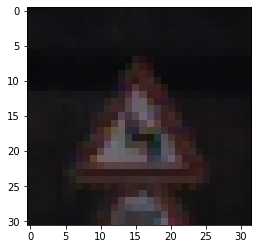

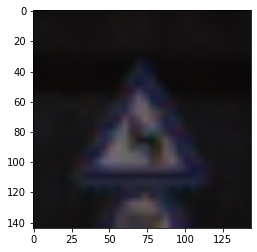

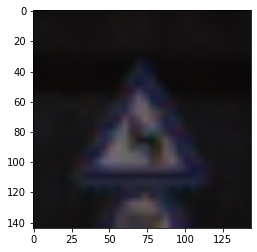

In [12]:
# check imágenes 
from PIL import Image

i_img = 27000

print(df["Tag_1"][i_img])
print(df["Tag_2"][i_img])

#imagen original 
image = imread(df["Fullpath"][i_img])
plt.imshow(image)
plt.show()

# imagen en vector X
img = Image.fromarray(X[i_img])
plt.imshow(img)
plt.show()

# imagen desde dataframe
img2 = Image.fromarray(np.array(df["Image"][i_img]))
plt.imshow(img2)
plt.show()


In [10]:
X.shape

(37109, 144, 144, 3)

In [14]:
X.shape[3]

3

In [15]:
# se añade una dimensión para hacerla analizable (depende del modelo)
X_train = X.reshape(X.shape[0],X.shape[1],X.shape[2],X.shape[3],1)
X_train.shape

(37109, 144, 144, 3, 1)

In [13]:
y_sign

array(['Speed20', 'Speed20', 'Speed20', ..., 'StopProhibOvertakeTruck',
       'StopProhibOvertakeTruck', 'StopProhibOvertakeTruck'], dtype=object)

In [14]:
y_class1

array(['speed', 'speed', 'speed', ..., 'Others', 'Others', 'Others'],
      dtype=object)

In [15]:
y_class2

array(['target', 'target', 'target', ..., 'Others', 'Others', 'Others'],
      dtype=object)

In [16]:
import tensorflow as tf
from tensorflow.keras.preprocessing import image
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np
from skimage.io import imread
import cv2

# librería de apoyo para utilizar redes preentrenadas
from tensorflow.keras.applications.resnet_v2 import ResNet50V2, decode_predictions, preprocess_input



In [21]:
%%time
# con esta instrucción se está descargando el modelo completo original

base_model = ResNet50V2(input_shape=(img_width, img_height, 3),      #permite ajustar los parámetros de las imágenes que se inserten en la red neuronal
                       include_top=False,
                       weights = "imagenet",
                       classifier_activation='softmax')

# se entrenan las capas previamente entrenadas
for layer in base_model_ResNet50V2.layers:
    layer.trainable = False

##### capas de ajuste a lo que se desea que haga el modelo #####
x0 = layers.Flatten()(base_model_ResNet50V2.output)  # Flatten the output layer to 1 dimension
x1 = layers.Dense(2 , activation='softmax')(x0)     # se añade una capa binaria para ajustarse a las posibilidades de la salida

# se concatena la primera capa (base_model_ResNet50V2.input) con la última capa (x3)
model_ResNet50V2 = tf.keras.models.Model(base_model_ResNet50V2.input, x1)

model_ResNet50V2.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy',metrics = ['acc'])
RR50v2hist = model_ResNet50V2.fit(train_ds,
                    validation_data = val_ds,
                    epochs = 10,
                    verbose=1)

94674944/94668760 [==============================] - 31s 0us/step
Wall time: 34.5 s
